In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:

def SHMF_old(mass, mass_min=-4, Nbins=45, plot=True):
 
    # ana_mass = mass/np.nanmax(mass) #normalizing by host mass
    # ana_mass[:, 0] = np.nan # removing the host mass from the matrix
    
    mass_frac = mass/np.nanmax(mass) #normalizing by host mass
    mass_frac[:, 0] = 0.0  # removing the host mass from the matrix
    zero_mask = mass_frac != 0.0 
    ana_mass = np.log10(np.where(zero_mask, mass_frac, np.nan))  # up until here the stats are good

    print(ana_mass)
    
    def histofunc(mass, bins=False): # nested function
        if bins==True:
            return np.histogram(mass, range=(mass_min, 0), bins=Nbins)
        else:
            return np.histogram(mass, range=(mass_min, 0), bins=Nbins)[0]

    # now to start counting!
    m_counts, bins = histofunc(ana_mass[0], bins=True)  # to be keep in memory, only needs to be measured once
    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    I = np.apply_along_axis(histofunc, 1, ana_mass)  # this applies the histogram to the whole matrix

    SHMF_ave = np.average(I, axis=0)

    SHMF_std = np.std(I, axis=0)
        
    if plot == True:
        plt.figure(figsize=(8, 8))

        plt.plot(bincenters, np.log10(SHMF_ave/binsize), label="average", color="black")
        plt.plot(bincenters, np.log10((SHMF_ave+SHMF_std)/binsize), label="1 $\sigma$", ls=":", color="grey")
        plt.plot(bincenters, np.log10((SHMF_ave-SHMF_std)/binsize), ls=":", color="grey")

        plt.xlabel("log (m/M)", fontsize=15)
        plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=15)
        plt.legend(fontsize=15)
        plt.xlim(-3.5)
        plt.show()

    print(binsize)

    return bincenters, np.array([SHMF_ave, SHMF_std]), I

In [65]:
mass = np.load("../../data/3000_12_8/acc_surv_mass.npy")[0:3000]

[[        nan -3.93733153 -3.40732376 ...         nan         nan
          nan]
 [        nan -3.98508636 -3.55872321 ...         nan         nan
          nan]
 [        nan -3.09841946 -3.4260253  ...         nan         nan
          nan]
 ...
 [        nan -3.21471994 -0.60931598 ...         nan         nan
          nan]
 [        nan -2.98091995 -3.89932172 ...         nan         nan
          nan]
 [        nan -3.44754579 -2.89295272 ...         nan         nan
          nan]]


/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_23012/851458789.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(bincenters, np.log10(SHMF_ave/binsize), label="average", color="black")
/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_23012/851458789.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(bincenters, np.log10((SHMF_ave+SHMF_std)/binsize), label="1 $\sigma$", ls=":", color="grey")
/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_23012/851458789.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.plot(bincenters, np.log10((SHMF_ave-SHMF_std)/binsize), ls=":", color="grey")
/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_23012/851458789.py:35: RuntimeWarning: invalid value encountered in log10
  plt.plot(bincenters, np.log10((SHMF_ave-SHMF_std)/binsize), ls=":", color="grey")


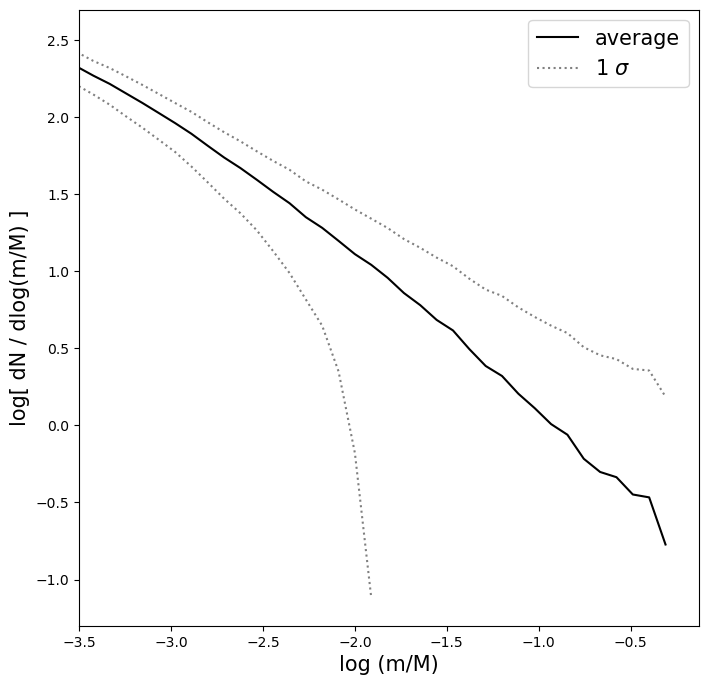

0.08888888888888902


In [66]:
_,_,I = SHMF_old(mass)

In [68]:
counts = I/0.08888888888888902

In [69]:
psi_bins = np.linspace(-4,0,45)

/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_23012/2173751218.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(psi_bins, np.log10(counts[89]))


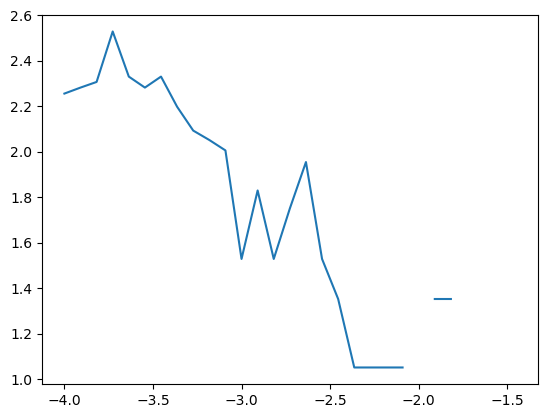

In [76]:
plt.plot(psi_bins, np.log10(counts[89]))
